#  Clasificación: Predecir Diabetes

1. Carga bestmodel
2. Preparación de datos creando un pipeline
3. valuación de modelos
4. Pipeline del modelo final
5. Guardamos el modelo

In [115]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [116]:
#Librerías para el Pipe
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder

#Cargamos el mejor modelo
+ TREE

In [117]:
#Cargamos el modelo
import pickle
filename = 'modelo-clas-hiper.pkl'
best_estimator, labelencoder, variables = pickle.load(open(filename, 'rb'))

# **1. Preparación de datos creando un pipeline**


In [119]:
# Se cargan los datos
data = pd.read_excel("datos_categoricos_diabetes_dataset.xlsx") #Cargar datos en excel
data.head() #muestras los 5 primeros registros

,Unnamed: 0,age,physical_activity_minutes_per_week,family_history_diabetes,bmi,waist_to_hip_ratio,systolic_bp,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,insulin_level,hba1c,diagnosed_diabetes
0,0,Adulto Medio,Adecuada,0,Obesidad,Moderado,Hipertensión 1,Normal,Límite Alto,Normal,Diabetes,Normal,Diabetes,1
1,1,Adulto Medio,Baja,0,Normal,Bajo,Elevada,Normal,Óptimo,Normal,Normal,Bajo,Normal,0
2,2,Adulto Medio,Inactivo,1,Normal,Moderado,Normal,Alto,Óptimo,Normal,Prediabetes,Normal,Diabetes,1
3,3,Adulto Mayor,Inactivo,0,Sobrepeso,Moderado,Normal,Normal,Óptimo,Normal,Diabetes,Normal,Diabetes,1
4,4,Adulto Medio,Baja,0,Normal,Bajo,Normal,Normal,Casi Óptimo,Límite Alto,Diabetes,Normal,Diabetes,1


In [120]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          100000 non-null  int64 
 1   age                                 100000 non-null  object
 2   physical_activity_minutes_per_week  100000 non-null  object
 3   family_history_diabetes             100000 non-null  int64 
 4   bmi                                 100000 non-null  object
 5   waist_to_hip_ratio                  100000 non-null  object
 6   systolic_bp                         100000 non-null  object
 7   hdl_cholesterol                     100000 non-null  object
 8   ldl_cholesterol                     100000 non-null  object
 9   triglycerides                       100000 non-null  object
 10  glucose_fasting                     100000 non-null  object
 11  insulin_level                       1000

In [121]:
#Data Profiling
!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=True) # minimal=True
profile_data



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 17.32it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [125]:
#eliminamos variable irrelevante
data = data.drop("Unnamed: 0", axis=1)

In [126]:
#Descripción de variables numéricas
data.describe()

,family_history_diabetes,diagnosed_diabetes
count,100000.000000,100000.000000
mean,0.219410,0.599980
std,0.413849,0.489904
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


<Axes: >

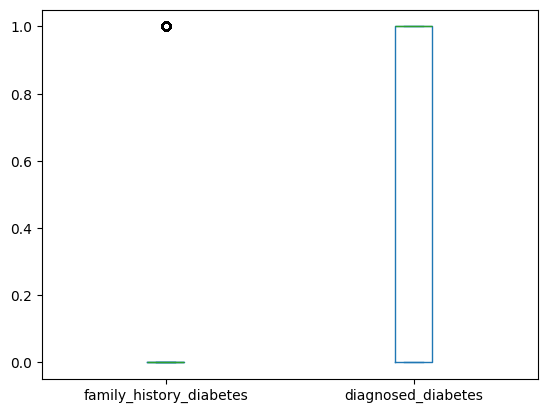

In [127]:
data.plot(kind='box')

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   age                                 100000 non-null  object
 1   physical_activity_minutes_per_week  100000 non-null  object
 2   family_history_diabetes             100000 non-null  int64 
 3   bmi                                 100000 non-null  object
 4   waist_to_hip_ratio                  100000 non-null  object
 5   systolic_bp                         100000 non-null  object
 6   hdl_cholesterol                     100000 non-null  object
 7   ldl_cholesterol                     100000 non-null  object
 8   triglycerides                       100000 non-null  object
 9   glucose_fasting                     100000 non-null  object
 10  insulin_level                       100000 non-null  object
 11  hba1c                               1000

# **Pipeline para Preparación de los Datos**

In [129]:
#Separar predictoras y objetivo
X = data.drop("diagnosed_diabetes", axis = 1) # Variables predictoras
Y = data['diagnosed_diabetes'] #Variable objetivo

In [130]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['age', 'physical_activity_minutes_per_week', 'family_history_diabetes', 'bmi','waist_to_hip_ratio','systolic_bp','hdl_cholesterol','ldl_cholesterol','triglycerides','glucose_fasting','insulin_level','hba1c']
#numeric_cols = NO aplica


In [131]:
#Paso 1: Limpiar atípicos
#no tiene atipicos

In [132]:
# Paso 2: Imputar y transformaciones

# Para variables categóricas: imputar por moda y crear dummies
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('dummies', OneHotEncoder(drop='if_binary',handle_unknown='ignore', sparse_output=False))
])

# Unir los dos pasos anteriores, en este caso se simula la union aunque solo tengamos categoricas
missing_transformations = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_cols)
])

In [133]:
# Definir el pipeline completo

pipe = Pipeline(steps=[
    #('outliers', FunctionTransformer(remove_outliers)), no tiene outliers
    ('preprocessor', missing_transformations)
])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummies',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['age',
                                                   'physical_activity_minutes_per_week',
                                                   'family_history_diabetes',
                                                   'bmi', 'waist_to_hip_ratio',
                                                   'systolic_bp',
                                                   'hdl_cholesterol',
                                                   'ldl_cholesterol',
                                                   'triglycerides',
                                                   'glucose_fasting',
                                                   'insulin_level',
                                                   'hba1c'])]))])

In [135]:
#Aplicar el pipe a los datos
X_processed = pipe.fit_transform(X)
X_processed[:5]


array([[0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 1., 0., 0.]])

# **4. Creacion Pipeline despliegue final**

In [136]:
# Crea el pipeline con el escalado, codificación y modelo
from sklearn.pipeline import Pipeline

pipeline_model = Pipeline([
    ('preprocessor', pipe),  # Aplica el preprocesamiento
    ('model', best_estimator)  # Modelo
])
pipeline_model

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('dummies',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['age',
                                                                    'physical_activity_minutes_per_week',
                                                                    'family_history_diabetes',
                                                                    'bmi',
                                                                    'waist_to_hip_ratio',
                                                                    'systolic_bp',
                                                                    'hdl_cholesterol',
                                                                    'ldl_cholesterol',
                                                                    'triglycerides',
                                                                    'glucose_fasting',
                                                                    'insulin_level',
                                                                    'hba1c'])]))])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=183,
                                        random_state=42))])

In [137]:
#Entrenar el modelo
pipeline_model.fit(X, Y)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('dummies',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['age',
                                                                    'physical_activity_minutes_per_week',
                                                                    'family_history_diabetes',
                                                                    'bmi',
                                                                    'waist_to_hip_ratio',
                                                                    'systolic_bp',
                                                                    'hdl_cholesterol',
                                                                    'ldl_cholesterol',
                                                                    'triglycerides',
                                                                    'glucose_fasting',
                                                                    'insulin_level',
                                                                    'hba1c'])]))])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=183,
                                        random_state=42))])

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = pipeline_model.predict(X)

print("Accuracy:", accuracy_score(Y, y_pred))
print("Precision:", precision_score(Y, y_pred, average='weighted'))
print("Recall:", recall_score(Y, y_pred, average='weighted'))
print("F1-score:", f1_score(Y, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(Y, y_pred))

Accuracy: 0.91421
Precision: 0.9293597995100965
Recall: 0.91421
F1-score: 0.9150613800942998

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     40002
           1       1.00      0.86      0.92     59998

    accuracy                           0.91    100000
   macro avg       0.91      0.93      0.91    100000
weighted avg       0.93      0.91      0.92    100000



# **5. Guardamos el modelo**

In [139]:
#Se guarda el pipeline
import pickle
filename = 'pipeline_modelo.pkl'
pickle.dump(pipeline_model, open(filename, 'wb'))